In [1]:
import sympy as sp
from sympy import elliptic_f
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import fsolve
# from scipy.ndimage import map_coordinates
from scipy.interpolate import griddata

In [2]:
# Definir las variables simbólicas
x0, n, us, u  = sp.symbols('x0 n us, u')

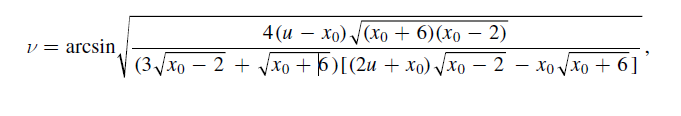

In [3]:
# Definir la función simbólica nu
def nu(x0_val, u_val):
    # Definir las variables simbólicas
    x0, u = sp.symbols('x0 u')

    # Definir términos intermedios utilizando sympy
    term1 = 4 * (u - x0) * sp.sqrt((x0 + 6) * (x0 - 2))
    term2 = 3 * sp.sqrt(x0 - 2) + sp.sqrt(x0 + 6)
    term3 = (2 * u + x0) * sp.sqrt(x0 - 2) - x0 * sp.sqrt(x0 + 6)

    # Definir la expresión para `nu` con arcsin y sqrt en sympy
    nu_expr = sp.asin(sp.sqrt(term1 / (term2 * term3)))

    # Evaluar la expresión simbólica con los valores dados
    return nu_expr.subs({x0: x0_val, u: u_val})


In [4]:
nu(x0,u)

asin(sqrt(sqrt((x0 - 2)*(x0 + 6))*(4*u - 4*x0)/((-x0*sqrt(x0 + 6) + (2*u + x0)*sqrt(x0 - 2))*(3*sqrt(x0 - 2) + sqrt(x0 + 6)))))

In [5]:
# Ejemplo de uso con valores específicos
nu(5.5, 10)

0.721762476271296

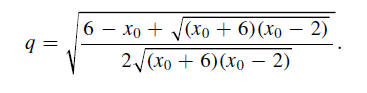

In [6]:
# Definir la función simbólica q
def q(x0_val):
    # Definir la variable simbólica
    x0 = sp.symbols('x0')

    # Definir términos intermedios utilizando sympy
    term1 = 6 - x0 + sp.sqrt((x0 + 6) * (x0 - 2))
    term2 = 2 * sp.sqrt((x0 + 6) * (x0 - 2))

    # Definir la expresión para `q` con sqrt en sympy
    q_expr = sp.sqrt(term1 / term2)

    # Evaluar la expresión simbólica con el valor dado de x0
    return q_expr.subs(x0, x0_val)



In [7]:
q(x0)

sqrt(2)*sqrt((-x0 + sqrt((x0 - 2)*(x0 + 6)) + 6)/sqrt((x0 - 2)*(x0 + 6)))/2

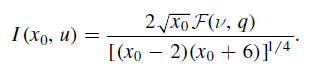

In [8]:
# # Definir la función I(x0, u)
# def I(x0, u):
#     nu_eval = nu(x0, u)  # Evaluamos nu
#     q_eval = q(x0)       # Evaluamos q
#     a = 2 * sp.sqrt(x0) * elliptic_f(nu_eval, q_eval) # Calculamos a
#     b = ((x0 - 2.0) * (x0 + 6.0))**0.25  # Calculamos b
#     return a / b  # Devuelven el resultado


# Definir la función I(x0, u) usando elliptic_f
def I(x0, u):
    nu_eval = nu(x0, u)  # Evaluamos nu
    q_eval = q(x0)       # Evaluamos q
    a = 2 * sp.sqrt(x0) * elliptic_f(nu_eval, q_eval).evalf()  # Función elíptica
    b = ((x0 - 2.0) * (x0 + 6.0))**0.25  # Cálculo de b
    return a / b




# Puedes llamar a la función I con valores simbólicos
I(x0, u)

2*sqrt(x0)*elliptic_f(asin(sqrt(sqrt((x0 - 2)*(x0 + 6))*(4*u - 4*x0)/((-x0*sqrt(x0 + 6) + (2*u + x0)*sqrt(x0 - 2))*(3*sqrt(x0 - 2) + sqrt(x0 + 6))))), sqrt(2)*sqrt((-x0 + sqrt((x0 - 2)*(x0 + 6)) + 6)/sqrt((x0 - 2)*(x0 + 6)))/2)/((x0 - 2.0)*(x0 + 6.0))**0.25

In [9]:
I(6.0,10).evalf()

1.29315023365268

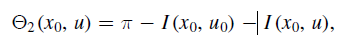

In [10]:
def Theta(x0, u=10.0, u0=10.0):
    return 3.1415169 - I(x0, u0) - I(x0, u)

# Llamada a la función Theta simbólicamente
# Theta_expr = Theta(x0, u)
# Theta_expr
#Theta_eval = sp.lambdify(x0,Theta(x0, u=10.0, u0=10.0) , 'numpy')

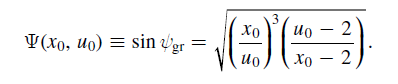

In [11]:
def Psi(x0,u0=10):
  return sp.sqrt((x0/u0)**3 * ((u0-2)/(x0-2)))

In [12]:
Psi(x0)

sqrt(5)*sqrt(x0**3/(x0 - 2))/25

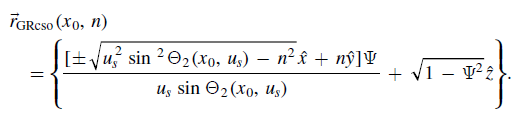

In [13]:
# Ahora definimos la función r
def r(x0, n=2.0, us=10.0):
    # Definir a y b simbólicamente
    a = sp.sqrt(us**2 * sp.sin(Theta(x0, us))**2 - n**2)
    b = Psi(x0) / (us * sp.sin(Theta(x0, us)))

    # Regresar el vector simbólico
    return sp.Matrix([a * b, n * b])

# Usar la función r
# r_vector = r(x0, n=8.0, us=10.0)
# r_vector

In [14]:
r(6.0)

Matrix([
[ 0.60812096381137],
[0.249377010514462]])

Como r(k) me regresa un vector (para sympy, un vector se identifica con sp.Matrix) si yo quiero tomar la componente i de ese vector uso [i]

para sacar la componente hago:

$$r(k)[i]$$

In [15]:
#Vamos a pedirle la segunda componente:
r(6.0)[1]

0.249377010514462

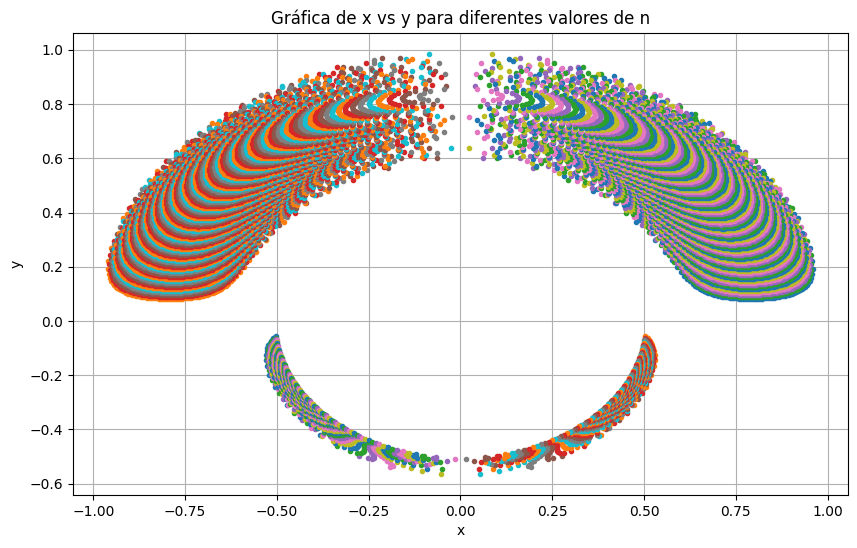

In [16]:
# Dominio de k
dom = np.linspace(4, 10, 100)

# Valores de n de 0 a 2 con pasos de 0.3
n_values = np.linspace(1.0, 10.0, 100)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada valor de n
for n in n_values:
    x = []
    y = []

    # Calcular x y y para cada valor de k en el dominio
    for k in dom:
        rk = r(k, n)

        if isinstance(rk[0], sp.core.mul.Mul):
            continue  # Saltar si el tipo no permite evaluación directa

        # Evaluar los valores simbólicos y almacenarlos como floats
        x.append(rk[0].evalf())
        y.append(rk[1].evalf())

    # Convertir las listas en arrays de numpy
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)

    # Graficar x, y para el valor actual de n
    plt.plot(x, y,'.' ,label=f'n = {n:.1f}')
    plt.plot(-x, y,'.' ,label=f'n = {n:.1f}')

# Configurar el gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de x vs y para diferentes valores de n')
#plt.legend()
plt.grid(True)
plt.show()

In [17]:
def generate_galaxy_model_aligned(x0, n_values):
    """
    Genera un modelo simulado de galaxia alineado con los rangos de dom y n_values.
    """
    # Crear un grid con las coordenadas alineadas
    x = x0
    y = n_values
    xx, yy = np.meshgrid(x, y)

    # Generar perfil gaussiano sobre las coordenadas alineadas
    sigma_x = 1.5  # Anchura en x
    sigma_y = 0.8  # Anchura en y
    galaxy = np.exp(-((xx - 7)**2 / (2 * sigma_x**2) + (yy - 5.5)**2 / (2 * sigma_y**2)))

    # Añadir ruido aleatorio para simular estrellas
    noise = 0.05 * np.random.random(galaxy.shape)
    galaxy += noise

    return galaxy, xx, yy


In [18]:
# Generar el modelo de galaxia
x0 = np.linspace(4, 10, 200)
n_values = np.linspace(1, 10, 200)
galaxy, xx, yy = generate_galaxy_model_aligned(x0, n_values)

In [19]:
# Aplicar el mapeo r(x0, n) a cada punto de la galaxia
x0_flat = xx.ravel()
n_flat = yy.ravel()
galaxy_flat = galaxy.ravel()

mapped_x = []
mapped_y = []
mapped_intensity = []

for x0_val, n_val, intensity in zip(x0_flat, n_flat, galaxy_flat):
    rk = r(x0_val, n_val)
    if not rk[0].is_real or not rk[1].is_real:
        continue  # Descartar puntos complejos
    mapped_x.append(float(rk[0].evalf()))
    mapped_y.append(float(rk[1].evalf()))
    mapped_intensity.append(intensity)

# Convertir a arrays
mapped_x = np.array(mapped_x)
mapped_y = np.array(mapped_y)
mapped_intensity = np.array(mapped_intensity)

KeyboardInterrupt: 

In [20]:
# Aplicar el mapeo r(x0, n) a cada punto de la galaxia
x0_flat = xx.ravel()
n_flat = yy.ravel()
galaxy_flat = galaxy.ravel()

mapped_x = []
mapped_y = []
mapped_intensity = []

for x0_val, n_val, intensity in zip(x0_flat, n_flat, galaxy_flat):
    rk = r(x0_val, n_val)
    if not rk[0].is_real or not rk[1].is_real:
        continue  # Descartar puntos complejos
    
    # Coordenadas mapeadas originales (r1,r2)
    mapped_x.append(float(rk[0].evalf()))
    mapped_y.append(float(rk[1].evalf()))
    mapped_intensity.append(intensity)
    
    # Coordenadas reflejadas (-r1, r2)
    mapped_x.append(-float(rk[0].evalf()))
    mapped_y.append(float(rk[1].evalf()))
    mapped_intensity.append(intensity)

    # Coordenadas reflejadas (-r1, -r2)
    mapped_x.append(-float(rk[0].evalf()))
    mapped_y.append(-float(rk[1].evalf()))
    mapped_intensity.append(intensity)

    # Coordenadas reflejadas (r1, -r2)
    mapped_x.append(float(rk[0].evalf()))
    mapped_y.append(-float(rk[1].evalf()))
    mapped_intensity.append(intensity)

# Convertir a arrays
mapped_x = np.array(mapped_x)
mapped_y = np.array(mapped_y)
mapped_intensity = np.array(mapped_intensity)

In [21]:
# Crear un grid regular para reconstruir la imagen deformada
x_new, y_new = np.meshgrid(np.linspace(mapped_x.min(), mapped_x.max(), 200),
                           np.linspace(mapped_y.min(), mapped_y.max(), 200))

# Interpolación para obtener la intensidad en el nuevo grid
deformed_galaxy = griddata((mapped_x, mapped_y), mapped_intensity, (x_new, y_new), method='linear', fill_value=0)


In [22]:
# from scipy.interpolate import Rbf

# # Crear un grid regular para reconstruir la imagen deformada
# x_new, y_new = np.meshgrid(
#     np.linspace(mapped_x.min(), mapped_x.max(), 200),
#     np.linspace(mapped_y.min(), mapped_y.max(), 200)
# )

# # Crear un interpolador radial basado en los datos mapeados
# rbf_interpolator = Rbf(mapped_x, mapped_y, mapped_intensity, function='multiquadric', epsilon=1)

# # Aplicar el interpolador a las nuevas coordenadas del grid
# deformed_galaxy = rbf_interpolator(x_new, y_new)

In [23]:
# #interpolación personalizada:
# from scipy.spatial.distance import cdist

# def gaussian_interpolation(x_points, y_points, values, x_new, y_new, sigma=0.5):
#     # Crear arrays de puntos nuevos
#     new_points = np.array([x_new.ravel(), y_new.ravel()]).T
#     old_points = np.array([x_points, y_points]).T

#     # Calcular distancias entre puntos originales y nuevos
#     distances = cdist(new_points, old_points)

#     # Calcular pesos usando un kernel gaussiano
#     weights = np.exp(-(distances**2) / (2 * sigma**2))

#     # Normalizar pesos
#     weights /= weights.sum(axis=1, keepdims=True)

#     # Interpolar valores
#     interpolated_values = np.dot(weights, values)

#     return interpolated_values.reshape(x_new.shape)

# # Interpolación gaussiana personalizada
# deformed_galaxy = gaussian_interpolation(mapped_x, mapped_y, mapped_intensity, x_new, y_new, sigma=1.0)


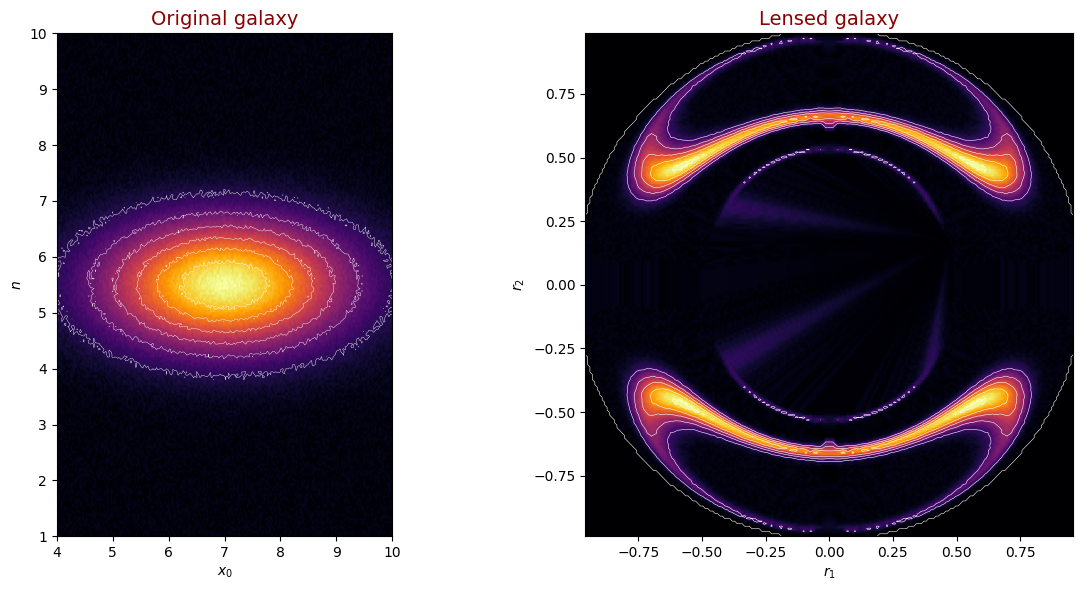

In [48]:
# Visualizar los resultados con isofotas
plt.figure(figsize=(12, 6))

# Imagen inicial con isofotas
plt.subplot(1, 2, 1)
plt.title("Original galaxy", size=14, color='darkred')
plt.imshow(galaxy, extent=(4, 10, 1, 10), origin='lower', cmap='inferno')
#plt.colorbar(label="Intensidad")
plt.contour(xx, yy, galaxy, levels=8, colors='white', linewidths=0.3)  # Añadir isofotas
plt.xlabel("$x_0$")
plt.ylabel("$n$")

# Imagen deformada con isofotas
plt.subplot(1, 2, 2)
plt.title("Lensed galaxy", size=14, color='darkred')
plt.imshow(deformed_galaxy, extent=(mapped_x.min(), mapped_x.max(), mapped_y.min(), mapped_y.max()), origin='lower', cmap='inferno')
#plt.colorbar(label="Intensidad")
plt.contour(x_new, y_new, deformed_galaxy, levels=5, colors='white', linewidths=0.4)  # Añadir isofotas
plt.xlabel("$r_1$")
plt.ylabel("$r_2$")

plt.tight_layout()
plt.show()

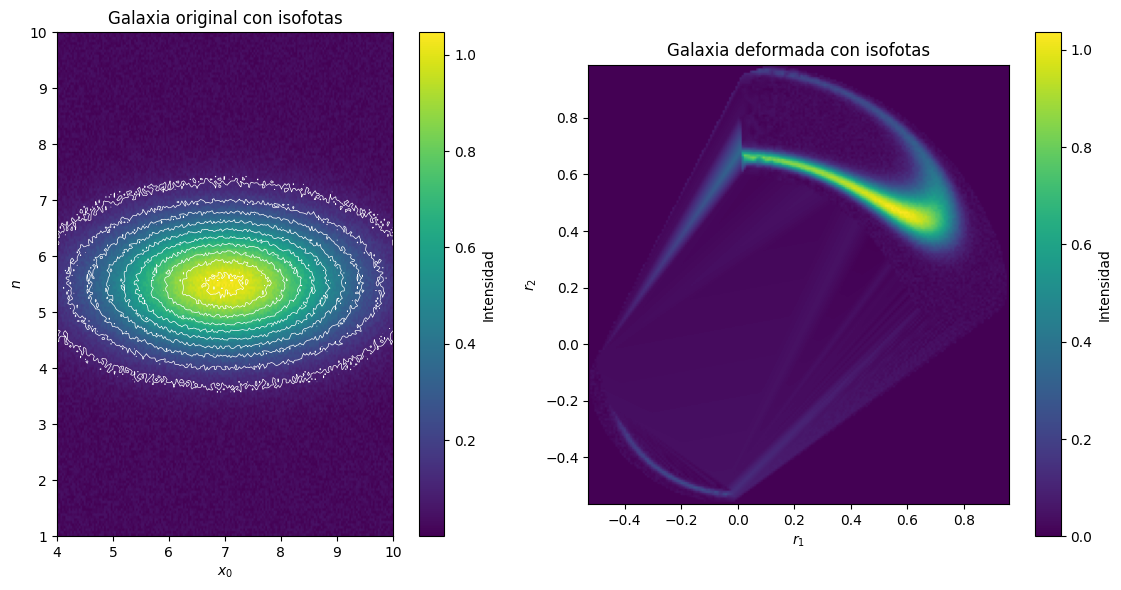

In [39]:
# Visualizar los resultados con isofotas
plt.figure(figsize=(12, 6))

# Imagen inicial con isofotas
plt.subplot(1, 2, 1)
plt.title("Galaxia original con isofotas")
plt.imshow(galaxy, extent=(4, 10, 1, 10), origin='lower', cmap='viridis')
plt.colorbar(label="Intensidad")
plt.contour(xx, yy, galaxy, levels=10, colors='white', linewidths=0.5)  # Añadir isofotas
plt.xlabel("$x_0$")
plt.ylabel("$n$")

# Imagen deformada con isofotas
plt.subplot(1, 2, 2)
plt.title("Galaxia deformada con isofotas")
plt.imshow(deformed_galaxy, extent=(mapped_x.min(), mapped_x.max(), mapped_y.min(), mapped_y.max()), origin='lower', cmap='viridis')
plt.colorbar(label="Intensidad")
#plt.contour(x_new, y_new, deformed_galaxy, levels=10, colors='white', linewidths=0.5)  # Añadir isofotas
plt.xlabel("$r_1$")
plt.ylabel("$r_2$")

plt.tight_layout()
plt.show()

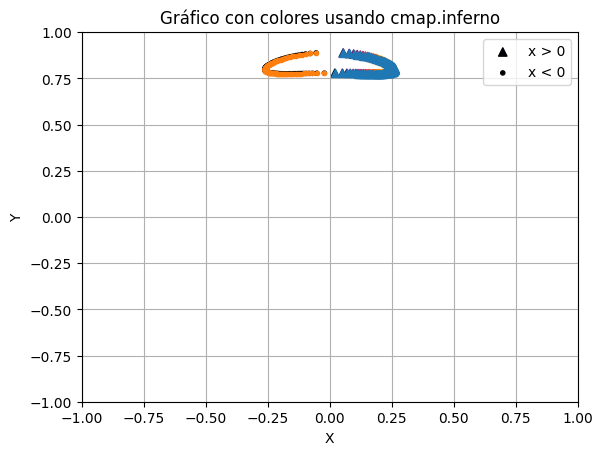

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y,'^')
plt.plot(-x,y,'.')
plt.xlim(-1,1)
plt.ylim(-1,1)

# Crear un mapa de colores
cmap = plt.cm.inferno
norm = plt.Normalize(vmin=min(x), vmax=max(x))  # Normalizar basado en x o cualquier criterio

# Graficar con colores basados en el mapa de colores
colors_positive = cmap(norm(x))  # Colores para los valores positivos
colors_negative = cmap(norm(-x))  # Colores para los valores negativos

# Crear el gráfico
plt.scatter(x, y, color=colors_positive, marker='^', label='x > 0')  # Con color para x
plt.scatter(-x, y, color=colors_negative, marker='.', label='x < 0')  # Con color para -x

# Configurar límites
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Etiquetas y leyenda
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Gráfico con colores usando cmap.inferno')
plt.show()


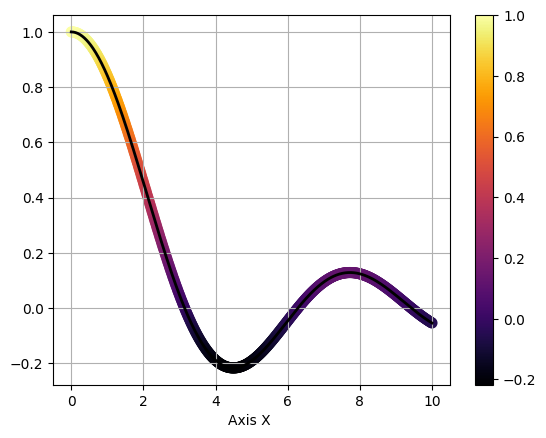

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Definir la función sinc
def sinc(x):
    return np.sinc(x / np.pi)  # La función sinc en Python incluye un factor de pi.

# Generar los datos
x = np.linspace(0, 10, 500)
y = sinc(x)

# Configurar el color de acuerdo al valor de y
norm = Normalize(vmin=min(y), vmax=max(y))
cmap = plt.cm.inferno  # Puedes ajustar este mapa para colores más vibrantes.

# Crear el gráfico
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=y, cmap=cmap, linewidth=2)
ax.plot(x, y, color='black', lw=2)  # Línea base para claridad
plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
plt.xlabel('Axis X ')
plt.ylabel('')
plt.grid(True)
